In [42]:
import sklearn.metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer #Esta base de dados contém tipos de Câncer entre Benignos e Malignos
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import numpy as np



In [47]:
dados=load_breast_cancer()
cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names) 
cancer['Class']=dados.target 
cancer = cancer.dropna()


X = cancer.iloc[:,:-1].values
Y = cancer.iloc[:,-1].values

pca = PCA(n_components=2)
X = pca.fit_transform(X)



<AxesSubplot:>

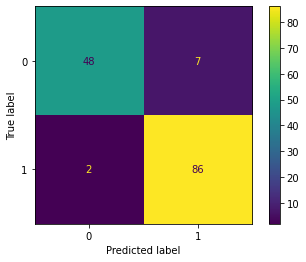

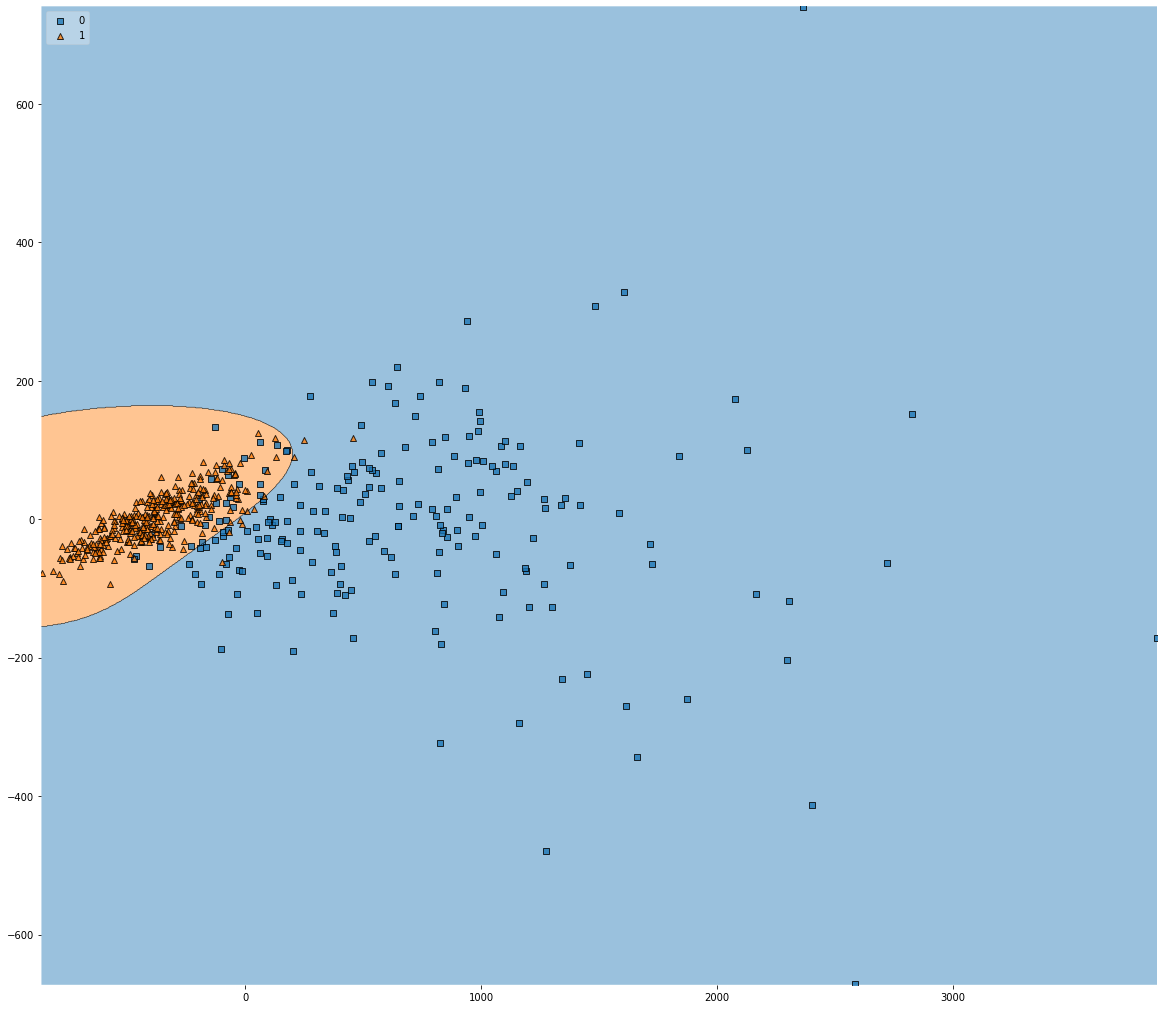

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=22)

svc_regressor = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_regressor.fit(x_train,y_train)

ConfusionMatrixDisplay.from_predictions(y_test, svc_regressor.predict(x_test))

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(18)
plot_decision_regions(X=X,y=Y,clf= svc_regressor,legend=2)


In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


print("Metricas:")
print(f"Acuracia: {accuracy_score(y_test,svc_regressor.predict(x_test))}")
print(f"precisao: {precision_score(y_test,svc_regressor.predict(x_test))}")
print(f"F1 : {f1_score(y_test,svc_regressor.predict(x_test))}")
print(f"Recall :{recall_score(y_test,svc_regressor.predict(x_test))}")

Metricas:
Acuracia: 0.9370629370629371
precisao: 0.9247311827956989
F1 : 0.9502762430939227
Recall :0.9772727272727273
